Задание 1

In [ ]:
import numpy as np
from scipy.io.wavfile import write

fs = 44100            # Частота дискретизации 
pulse_duration = 0.5  # Длительность одного импульса в секундах
pause_duration = 0.5  # Длительность паузы между импульсами
f = 440               # Частота сигнала (нота Ля)
amplitude = 0.5       # Амплитуда сигнала

# Создаем временную ось для одного импульса.
# np.linspace создаёт массив значений от 0 до pulse_duration с нужным числом сэмплов.
t_pulse = np.linspace(0, pulse_duration, int(fs * pulse_duration), endpoint=False)

# Вычисляем значения синусоиды: A*sin(2*pi*f*t)
pulse = amplitude * np.sin(2 * np.pi * f * t_pulse)

# Количество сэмплов, соответствующих длительности паузы.
num_samples_pause = int(fs * pause_duration)
# Массив из нулей для паузы.
pause = np.zeros(num_samples_pause)

# Объединяем массивы с сигналами и паузами
signal_mono = np.concatenate((pulse, pause, pulse, pause, pulse))
# Создаем стереосигнал
signal_stereo = np.vstack((signal_mono, signal_mono))

# Нормировка
signal_normalized = signal_stereo / np.max(np.abs(signal_stereo))

# Записываем сигнал в WAV-файл
output_filename = 'signal.wav'
write(output_filename, fs, np.transpose(signal_normalized))

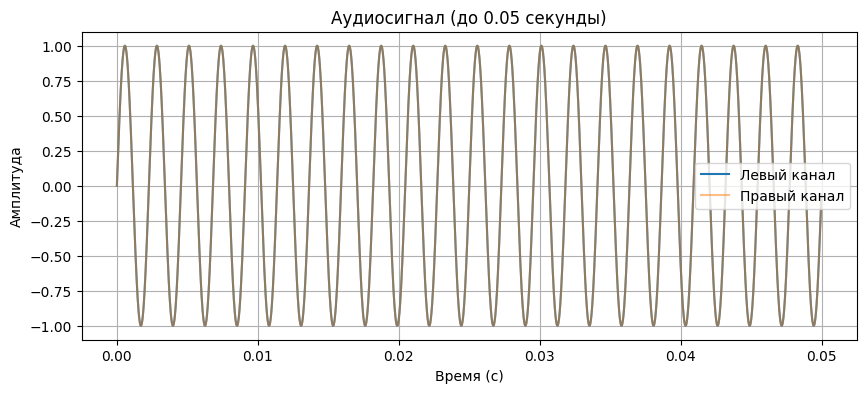

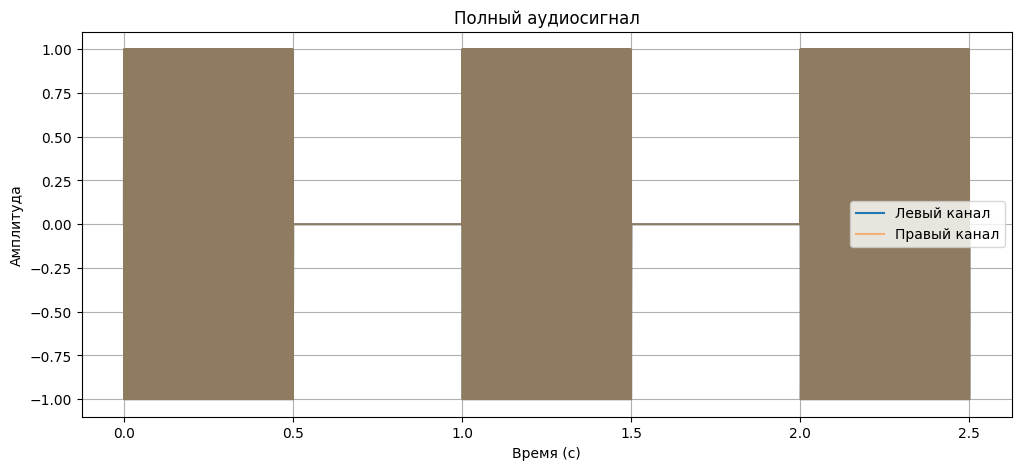

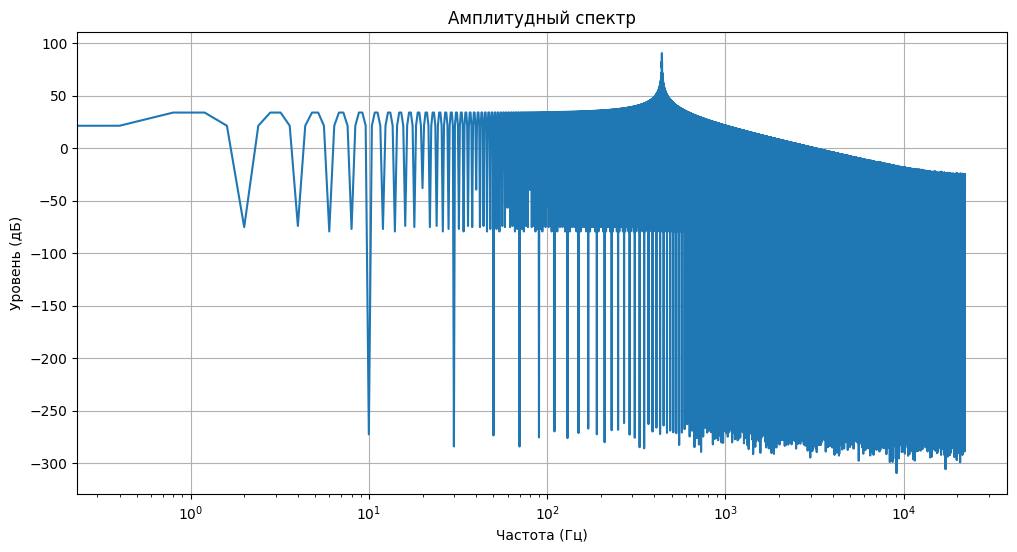

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Загрузка аудиофайла
sample_rate, data = wavfile.read('signal.wav')
data = data / np.max(np.abs(data))

# Извлечение каналов
left_channel = data[:, 0]
right_channel = data[:, 1]

# Создание моно-сигнала для спектра и спектрограммы
mono_signal = right_channel


# 1. График аудиосигнала до 0.05 секунды
n_samples = int(0.05 * sample_rate)
time_short = np.arange(n_samples) / sample_rate

plt.figure(figsize=(10, 4))
plt.plot(time_short, left_channel[:n_samples], label='Левый канал')
plt.plot(time_short, right_channel[:n_samples], label='Правый канал', alpha=0.5)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Аудиосигнал (до 0.05 секунды)')
plt.legend()
plt.grid()
plt.show()

# 2. График аудиосигнала для всей записи
duration = len(left_channel) / sample_rate  # Общая длительность
time_full = np.linspace(0, duration, len(left_channel), endpoint=False)

plt.figure(figsize=(12, 5))
plt.plot(time_full, left_channel, label='Левый канал')
plt.plot(time_full, right_channel, label='Правый канал', alpha=0.5)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Полный аудиосигнал')
plt.legend()
plt.grid()
plt.show()

# 3. График амплитудного спектра
fft_spectrum = np.fft.fft(mono_signal)
magnitude_spectrum = 20 * np.log10(np.abs(fft_spectrum))
freqs = np.fft.fftfreq(len(fft_spectrum), 1/sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], magnitude_spectrum[:len(freqs)//2])
plt.xlabel('Частота (Гц)')
plt.ylabel('Уровень (дБ)')
plt.title('Амплитудный спектр')
plt.grid()
plt.semilogx()
plt.show()